## 数据挖掘-homework1-22210980041-胡一航

#### 1. 请完成数据读入与简单清洗；

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
filename = 'HotPotForMac.csv'
df = pd.read_csv(filename)

首先是读取数据，我用的是pandas包里的read_csv函数，执行代码的时候需要在同目录下存在HotPotForMac.csv文件。  
大致浏览了下感觉数据已经清洗好了，且后续的分析绘图过程没有遇到问题，因此这里的略去了清洗数据的步骤。

#### 2. 将团购的季均销量转换为对数，对季均销量、团购上线天数、折扣力度绘制分布直方图，简单陈述你观察到的现象；

In [3]:
qsv_data = df['quarterly.sales.volume']
ln_qsv_data = np.log(qsv_data+1e-5)
oi_data = df['online.intervel']
dis_data = df.loc[ : ,'discount']

这里将数据取出备用。  
在将季均销量取对数时为了避免出现-inf 给所有的销售额增加了1e-5，这可以视为浮点数的正常浮动。  
这个操作将把本被转化为-inf的log(0)映射到-11.5左右，为后续处理带来方便。

In [4]:
from matplotlib import font_manager
my_font = font_manager.FontProperties(family='SimHei', size=24)

In [5]:
def plothist(data,bins,xlabel,title):
    plt.figure(figsize=(10,2),dpi=80)
    nums,bins,patches = plt.hist(list(data),bins=bins,edgecolor='k')
    bins = np.around(bins, decimals=1)
    plt.xticks(bins,bins,size=10)
    offset = (bins[1]-bins[0])/3
    for num,bin in zip(nums,bins):
        plt.annotate(int(num),xy=(bin+offset,num+3),xytext=(bin+offset,num+3))
    plt.xlabel(xlabel, fontproperties=my_font,size = 10)
    plt.ylabel('频数', fontproperties=my_font,size = 10)
    plt.title(title,size=12, fontproperties=my_font)
    plt.grid(alpha=0.4,axis="y")
    plt.show()

由于后续的画直方图的总体过程是类似的，这里写了一个简易的函数简化后续代码。  
需要输入的参数分别是：data(画图用的数据),bins(画图分的区间，如果输入的是int将会由系统自动生成),xlabel(x轴注解),title(标题).

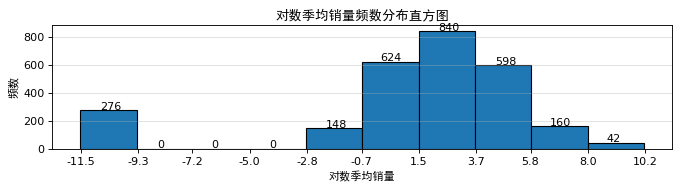

In [6]:
bins = 10
xlabel = '对数季均销量'
title = '对数季均销量频数分布直方图'
plothist(ln_qsv_data,bins,xlabel,title)

对数季均销量的直方图如上，最左侧的276个均为原销量为0的数据。  
刨除这些原本为0的数据，剩下的数据很符合中间高两头低的分布，  
且集中在中位数附近的数据更多，不过这个可能是log变化导致的结果。

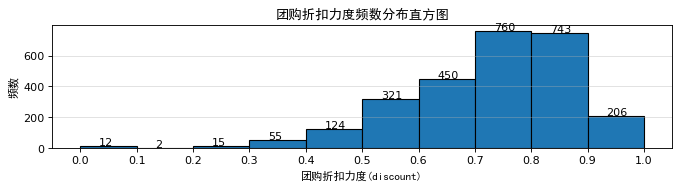

In [7]:
bins = [i/10 for i in range(11)]  
xlabel = '团购折扣力度(discount)'
title = '团购折扣力度频数分布直方图'
plothist(dis_data,bins,xlabel,title)

团购折扣力度频数分布直方图如上，  
可见大部分折扣集中在7-9折，符合人们的日常认知，  
非常优惠(低于5折)和价格没什么优惠(高于9折)的都很少。

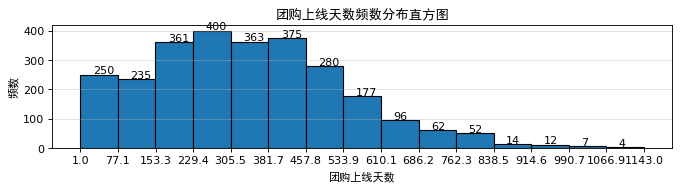

In [8]:
bins = 15
xlabel = '团购上线天数'
title = '团购上线天数频数分布直方图'
plothist(oi_data,bins,xlabel,title)

团购上线天数频数分布直方图如上，  
分布十分平滑，有点像一个F分布。  
大多数时间集中在150天-450天，大于600天的很少。


#### 3. 将火锅团购商家店名高频词统计出来，并绘制出词云，简单陈述你观察到的现象；提示：在统计火锅团购商家店名高频词时，可以将一些无意义的词组剔除，如“区”、“路”、“火锅”、“小区”、“分店”、“店”等；同时还需要先剔除非中文字符（数字和字母）。


In [9]:
import jieba
names = df['字段1']
names_words = []
for name in names:
    names_words += (jieba.lcut(name)[:])
stopwords = ['区','路','火锅','小区','分店','店','路店','主题','村店','门店','广场']  
counts = {}
# 用一个字典来统计出现的词汇和频数
for word in names_words:  
    if len(word) == 1:  
        continue 
    elif word in stopwords:
        continue
    else:  
        counts[word] = counts.get(word,0) + 1  
items = list(counts.items())  
items.sort(key=lambda x:x[1], reverse=True)  
# 对结果进行排序

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HONOR\AppData\Local\Temp\jieba.cache
Loading model cost 0.334 seconds.
Prefix dict has been built successfully.


这里用的是jieba库来进行分词的操作，stopwords给出了这个场景的一些禁用词。  
数字和字母在后续的if判断中被剔除了。

In [10]:
result='' #最后用来画图的字符串
for i in range(30):  
    word, count = items[i]
    for j in range(count):
        result += ' ' + word
    print ("{:<10}{:>7}".format(word, count),end = ' '*(4-len(word)))
    if (i+1) % 6 == 0: print('')

串串            244  重庆            206  串串香           150 私房            137  自助            125  小火锅           116 
鸡公             70  北京             61  肥牛             61  涮锅             59  清真             48  凤城             47  
三汁             45  成都             44  七婆             44  泰式             41  一品             39  印象             36  
麻辣             35  特色             34  芭蕉             34  京味             33  羊蝎子            30 铜锅             29  
鱼庄             29  养生             28  掌门             28  阎良             27  老兵             27  餐厅             27  


这里的result是最后用来画图的字符串，这里print出了出现最多的三十个词汇和他们的出现次数。  
这是西安市区的统计，结果重庆高居第二，说明重庆火锅还是深入人心啊。  
另外，我们可以发现串串总体上是非常流行的，  
自助和小火锅这种类型也很流行，大概能折射出现在人们聚餐时的某种倾向。  
另外第7流行的词是“鸡公”，回溯原本的数据会发现其实大多数出现的都是“鸡公煲”，看来这个分词库的函数需要再改进一下了。笔者本科的时候也非常喜欢鸡公煲（）。

In [11]:
import wordcloud
w=wordcloud.WordCloud(font_path='msyh.ttc',background_color='white',
                      width=1200,height=600,max_words=200,font_step=1)
w.generate(result)
w.to_file('wordcloud.jpg')

 <img src="wordcloud.jpg" width = "200" height = "100" alt="图片名称" align=center />

图云生成所用的是wordcloud包，会在脚本的执行目录生成相应的jpg文件。

#### 4. 用箱线图表示销量与团购价的关系，及销量与节假日通用的关系；尝试解读这两个箱线图呈现的现象；

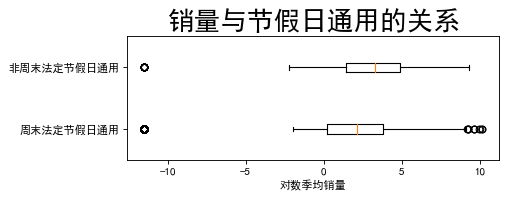

In [12]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
str1 = '周末法定节假日通用'
str2 = '非周末法定节假日通用'
available = ln_qsv_data[df['if.nonworkdays.available'] == str1]
unavailable = ln_qsv_data[df['if.nonworkdays.available'] == str2]
plt.figure(figsize=(6,2),dpi=80)
plt.boxplot([available,unavailable],labels=[str1,str2],vert=False)
plt.xlabel('对数季均销量', fontproperties=my_font,size = 10)
plt.title('销量与节假日通用的关系',fontproperties=my_font)
plt.show()

这个图的结果比较令我惊讶，因为不通用的团购居然总体销量好于通用的，我的常识推测中应该是相反的结果。  
不过两者的数据量差距其实比较大，不通用的只有500条左右的数据，而通用的有2000条左右的数据。  
这里我们可以对此针对性地给出一些猜测作为解释：  
1、非周末法定节假日的天数远多于周末法定节假日，因此总销量前者占优很正常。  
我们认知中的周末生意好是从日均的意义上来说的，而不是从总数的意义上来说的。      
2、平台默认的团购是不限日期的，而有一些不善经营的商家，他们的销量很低并且不怎么重视团购平台的各类操作，因此有很多这种不限时销量低的数据拖低了通用券整体的数据。   
3、单纯的是数据出现了问题，所给的数据不能说明问题。  
4、平日的券总体上更加优惠，即使是时间不便，也吸引了更多的顾客购买。另外，大多数券可能消费起来也没那么不便。

In [13]:
price_data = df['price']
price_bins = [price_data.quantile(0.2*i) for i in range(0,6)]
price_bins[-1] += 1
print(price_bins)

[1.0, 49.9, 79.0, 89.0, 158.0, 1366.0]


这个图与前者不同是，这里的两个变量都是定量的，而前者有一变量是定性的，这里我们将套餐价格划分为几个区间从而转化为某种定性的处理。  
这里划分用的区间是通过分位数生成的。

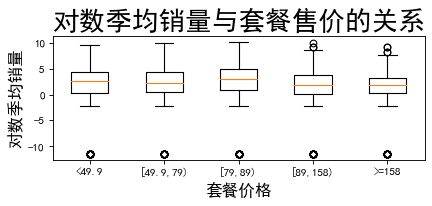

In [14]:
labels = ['<49.9','[49.9,79)','[79,89)','[89,158)','>=158']
group = pd.cut(x=price_data,bins=price_bins,right=False,labels=labels)
x = []
for label in labels:
    x.append(ln_qsv_data[group==label][:])
plt.figure(figsize=(6,2),dpi=80)    
plt.boxplot(x,labels=labels)
plt.ylabel('对数季均销量', fontproperties=my_font,size = 15)
plt.xlabel('套餐价格', fontproperties=my_font,size = 15)
plt.title('对数季均销量与套餐售价的关系',fontproperties=my_font)
plt.show()

首先，区间的划分给了我们一些套餐价格上的信息，  
每个区间的数据量大体是相近的，因此我们可以发现集中在80—90的套餐非常多，而大于158的套餐就相对少。  
总体上来看，套餐价格并没有对季均销量产生太大的影响，五个区间的差别都不算大。  
这隐含了销量上是递减的，很符合薄利多销的认知。  
另外，价格的设定应该都是商家考虑下或者是市场塑造下的较为合理的价格，因此套餐价格并没有对季均销量产生太大的影响是很合理的。  
即使有部分商家通过特殊的价格设定得到了较多的收益，也很难在这种统计数据中影响总体的规律。

#### 5. 用箱线图表示店名中包含的各类词汇与团购销量的关系，并尝试解读箱线图的含义

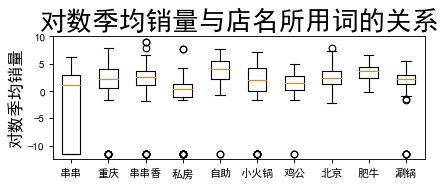

In [15]:
names = df['字段1']
names_words1 = []
for name in names:
    names_words1.append(jieba.lcut(name)[:])

popular_words = [items[i][0] for i in range(10)]
popular_words_ln_qsv = [[] for _ in range(10)]

for i in range(len(names)):
    for j in range(10):
        if popular_words[j] in names_words1[i]:
            popular_words_ln_qsv[j].append(ln_qsv_data[i])
plt.figure(figsize=(6,2),dpi=80)    
plt.boxplot(popular_words_ln_qsv,labels=popular_words)
plt.ylabel('对数季均销量', fontproperties=my_font,size = 15)
plt.title('对数季均销量与店名所用词的关系',fontproperties=my_font)
plt.show()            

可以发现串串很多，但是销量数据并不乐观，  
而相应的串串香的表现反而非常不错，我认为可能是有较多的名字中只带有串串的且表现很差的商家。  
可以发现自助现在很受欢迎。   
相对来说表现比较好的关键词有“重庆”、“串串香”、“自助”、“北京”、“肥牛”。  
“私房”表现不容乐观，其余的都表现平平。